In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('Credit card transactions - India - Simple.csv')

In [3]:
df.head(5)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [5]:
df.describe(include="object")

,City,Date,Card Type,Exp Type,Gender
count,26052,26052,26052,26052,26052
unique,986,600,4,6,2
top,"Bengaluru, India",20-Sep-14,Silver,Food,F
freq,3552,65,6840,5463,13680


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
df.shape

(26052, 7)

The Dataset consists of 26,052 entries and 6 columns, with each column representing different attributes of credit card transactions.

1. Data Structure: The dataset contains information about credit card transactions, including attributes such as 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', and 'Amount'.

2. Data Types: All columns are of object (string) data type except for the 'Amount' column, which is of integer data type.

3. Non-Null Count: There are no missing values in any of the columns, as indicated by the non-null counts being equal to the total number of entries (26,052).

## Data Cleaning

In [8]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [9]:
df.drop_duplicates()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [10]:
df['City'] = df['City'].str.replace(', India', '')
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,Kolkata,22-Jun-14,Silver,Travel,F,128191
26048,26048,Pune,3-Aug-14,Signature,Travel,M,246316
26049,26049,Hyderabad,16-Jan-15,Silver,Travel,M,265019
26050,26050,Kanpur,14-Sep-14,Silver,Travel,M,88174


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [12]:
df['Year'] = df['Date'].dt.year

In [13]:
df['is_weekend'] = df['Date'].dt.dayofweek // 5

## Feature Engineering

In [14]:

# Extracting Date Components
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# week Indicators
week_mapping = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun',
    
    
}
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['DayOfWeek'] = df['DayOfWeek'].map(week_mapping)

# Seasonality Indicators
season_mapping = {
    1: 'Winter',
    2: 'Summer',
    3: 'Monsoon',
    4: 'Post-monsoon'
}

# Apply the mapping to the 'Season' column
df['Season'] = (df['Month'] % 12 + 3) // 3
df['Season'] = df['Season'].map(season_mapping)

df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,Year,is_weekend,Month,Day,DayOfWeek,Season
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,0,10,29,Wed,Post-monsoon
1,1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,0,8,22,Fri,Monsoon
2,2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,0,8,27,Wed,Monsoon
3,3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,1,4,12,Sat,Summer
4,4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,0,5,5,Tue,Summer


## Data Analysis

Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64


Text(0.5, 1.0, 'Total Amount Spent By Gender')

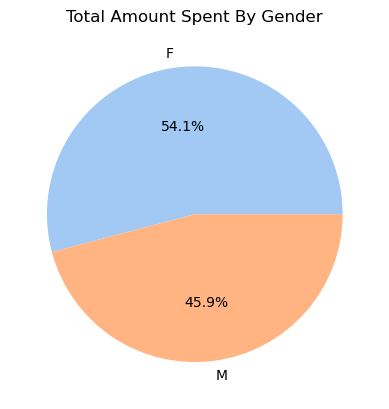

In [15]:
total_tran_by_gender = df.groupby('Gender')['Amount'].sum()
print(total_tran_by_gender)
colors = sns.color_palette('pastel')
plt.pie(total_tran_by_gender, labels=total_tran_by_gender.index,colors = colors, autopct='%1.1f%%', startangle=0)
plt.title('Total Amount Spent By Gender')

There are more female users that spend more amount than male user

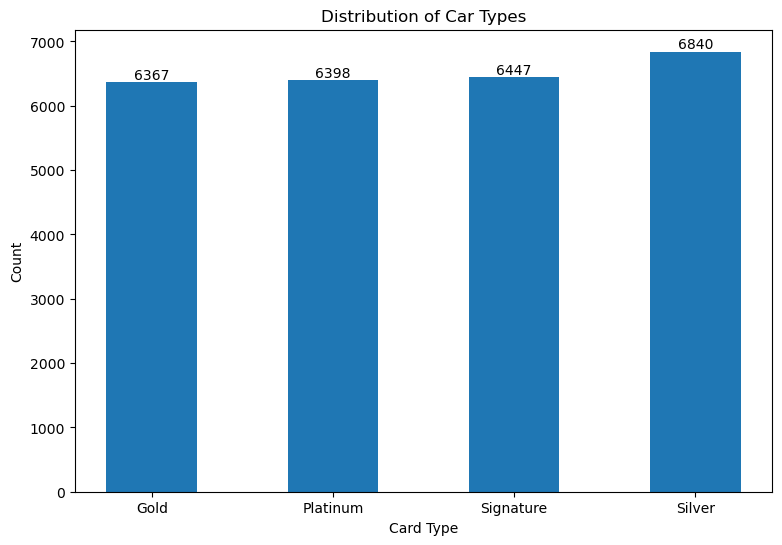

In [16]:
card_type = df.groupby('Card Type').size()
plt.figure(figsize=(9,6))
plt.bar(x=card_type.index, height=card_type.values, width=0.5)
plt.title('Distribution of Car Types')
plt.xlabel('Card Type')
plt.ylabel('Count')

for index, value in enumerate(card_type.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

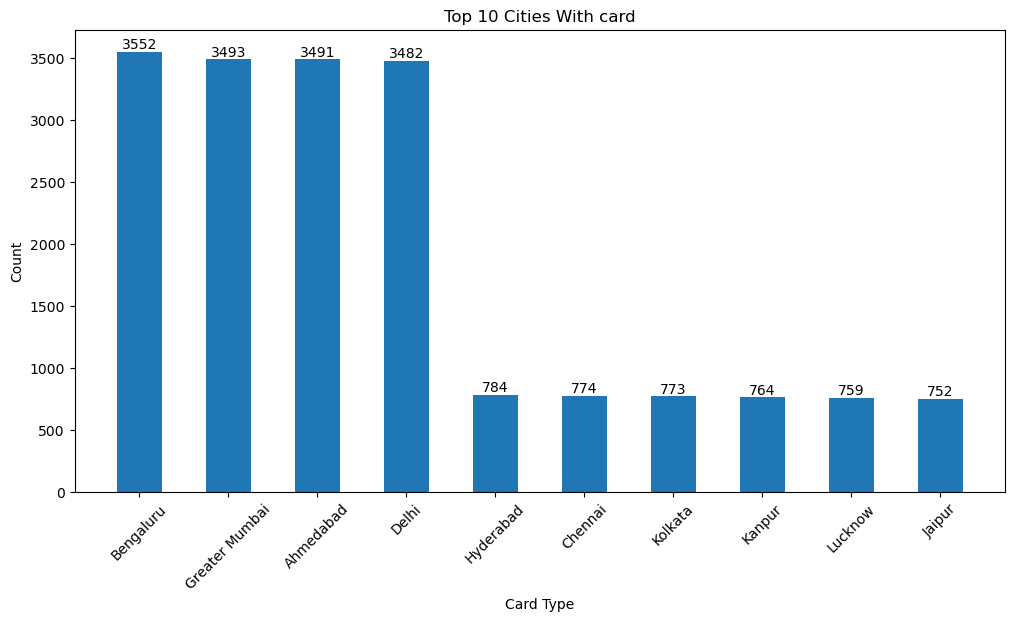

In [17]:
card_city = df.groupby('City').size().nlargest(10)
plt.figure(figsize=(12,6))
plt.bar(x=card_city.index,  height=card_city.values, width=.5)
plt.title('Top 10 Cities With card')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(card_city.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

Text(0, 0.5, 'City')

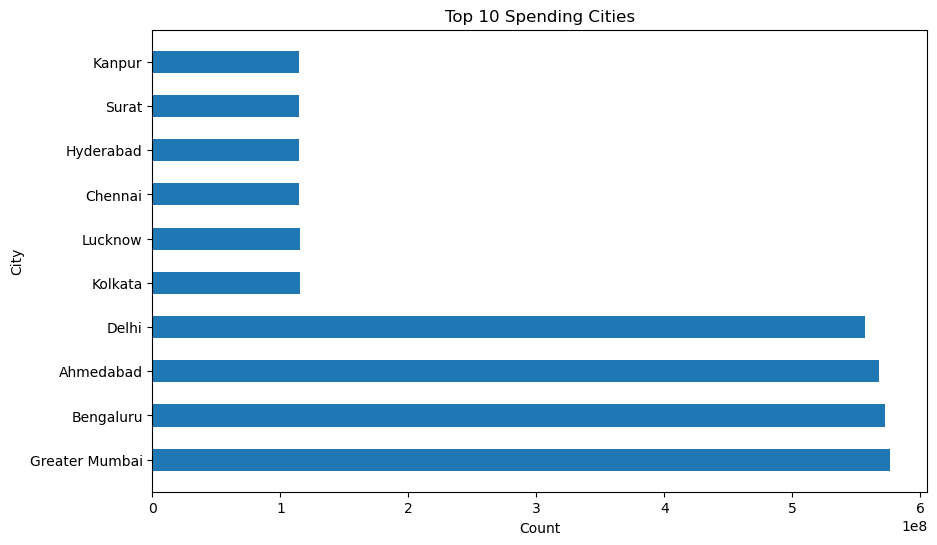

In [18]:
card_City = df.groupby('City')['Amount'].sum().nlargest(10)
plt.figure(figsize=(10,6))
plt.barh(y=card_City.index,  width=card_City.values, height=.5)
plt.title('Top 10 Spending Cities')
plt.xlabel('Count')
plt.ylabel('City')


Exp Type
Bills            907072473
Entertainment    726437536
Food             824724009
Fuel             789135821
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64


Text(0.5, 1.0, 'Amount Spent On Various Purposes')

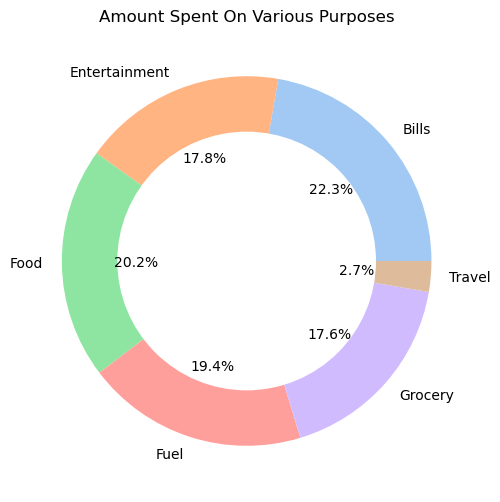

In [19]:
card_exp = df.groupby('Exp Type')['Amount'].sum()
print(card_exp)
plt.figure(figsize=(8,6))
colors = sns.color_palette('pastel')
plt.pie(card_exp, labels=card_exp.index,colors = colors, autopct='%1.1f%%', startangle=0)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Amount Spent On Various Purposes')

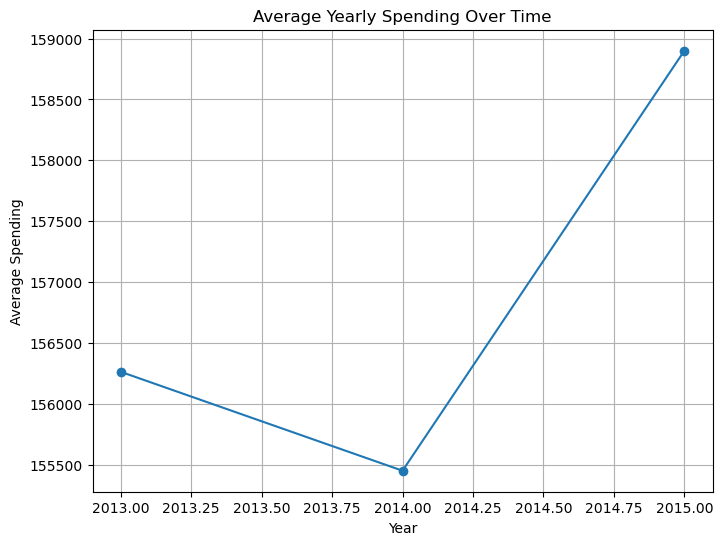

In [20]:
yearly_spend = df.groupby('Year')['Amount'].mean()
plt.figure(figsize=(8,6))
plt.plot(yearly_spend.index, yearly_spend.values, marker='o')
plt.title('Average Yearly Spending Over Time')
plt.xlabel('Year')
plt.ylabel('Average Spending')
plt.grid(True)

<Figure size 1000x600 with 0 Axes>

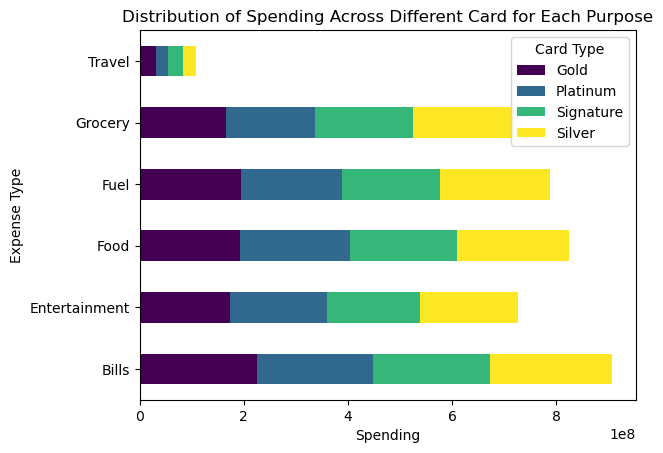

In [21]:
spending_dist = df.groupby(['Exp Type', 'Card Type'])['Amount'].sum().unstack()
plt.figure(figsize=(10, 6))
spending_dist.plot(kind='barh', stacked=True, cmap='viridis')
plt.title('Distribution of Spending Across Different Card for Each Purpose')
plt.xlabel('Spending')
plt.ylabel('Expense Type')
plt.legend(title='Card Type')

<Figure size 1000x600 with 0 Axes>

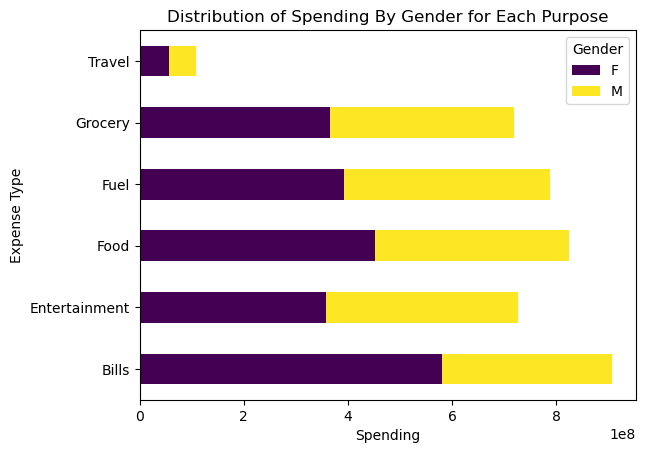

In [22]:
spending_dist = df.groupby(['Exp Type', 'Gender'])['Amount'].sum().unstack()
plt.figure(figsize=(10, 6))
spending_dist.plot(kind='barh', stacked=True, cmap='viridis')
plt.title('Distribution of Spending By Gender for Each Purpose')
plt.xlabel('Spending')
plt.ylabel('Expense Type')
plt.legend(title='Gender')

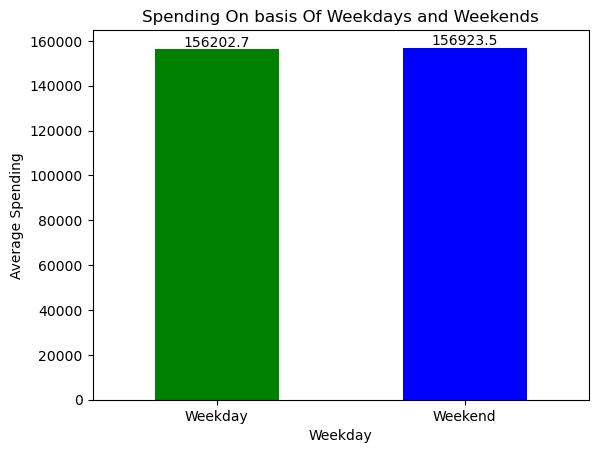

In [23]:
weekly_spend = df.groupby('is_weekend')['Amount'].mean()

weekly_spend.plot(kind='bar', color = ['Green', 'Blue'])
plt.title('Spending On basis Of Weekdays and Weekends')
plt.xlabel('Weekday')
plt.ylabel('Average Spending')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'],rotation=0)

for index, value in enumerate(weekly_spend.values):
    plt.text(index, value, str(value.round(1)), ha='center', va='bottom')

Text(0, 0.5, 'Average Spending')

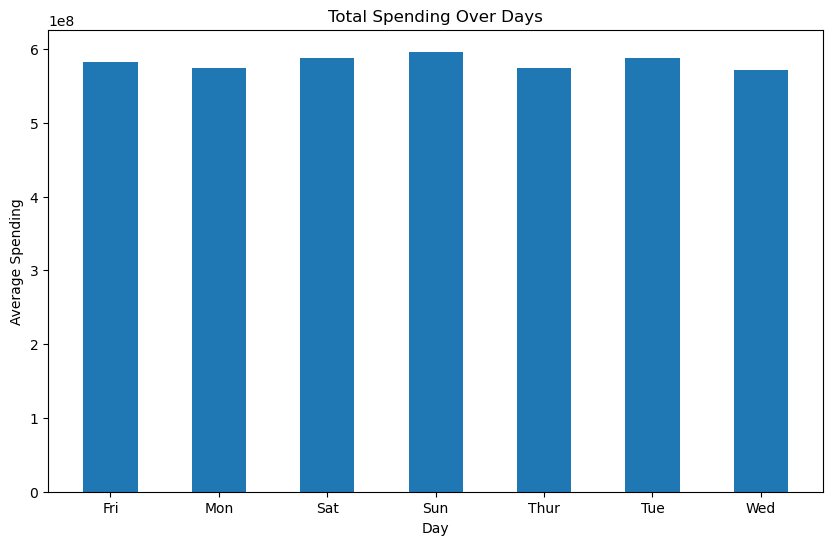

In [24]:
week_spend = df.groupby('DayOfWeek')['Amount'].sum()
plt.figure(figsize=(10,6))
plt.bar(x=week_spend.index, height = week_spend.values, width=0.5)
plt.title('Total Spending Over Days')
plt.xlabel('Day')
plt.ylabel('Average Spending')

Text(0, 0.5, 'Average Spending')

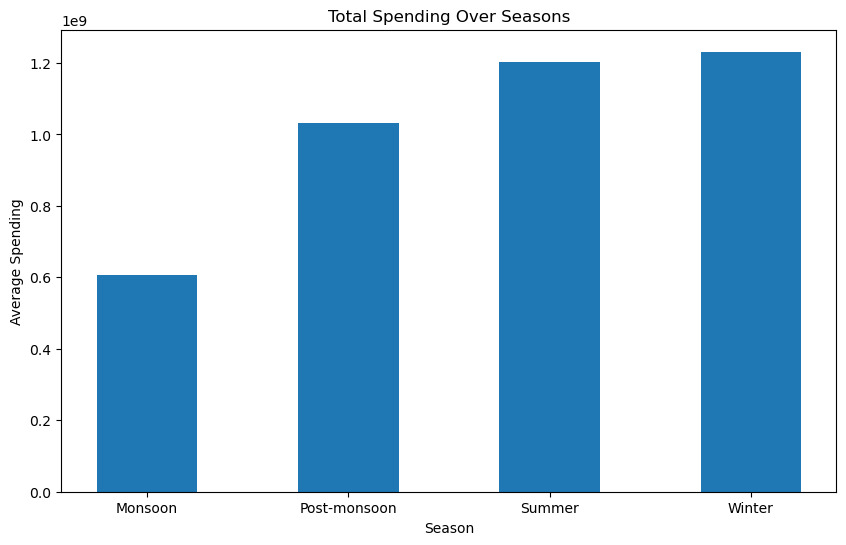

In [25]:
season_spend = df.groupby('Season')['Amount'].sum()
plt.figure(figsize=(10,6))
plt.bar(x=season_spend.index, height = season_spend.values, width=0.5)
plt.title('Total Spending Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Spending')